<a href="https://colab.research.google.com/github/dmswl0707/CoronaCoprosperityCard_DataScience/blob/main/word2vec%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_k_means_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81(%EB%AA%A8%EB%93%A0_%EC%97%B0%EB%A0%B9_%EB%A7%A4%EC%B6%9C%EA%B8%88%EC%95%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('ko/ko.bin') 
#https://github.com/Kyubyong/wordvectors word2vec 한국어 모델

In [ ]:
Word_vectors=model.wv
vocabs=Word_vectors.vocab.keys()
vocabs_list=list(vocabs)
vocabs_list

['관위',
 '정어리',
 '유식론',
 '장로회',
 '춘추관',
 '도입부',
 '민병',
 '어렵',
 '매니저',
 '청담',
 '광주시',
 '고민',
 '어로',
 '어록',
 '폴라리스',
 '십만',
 '관음',
 '효과적',
 '관의',
 '당뇨병',
 '영중추',
 '듣',
 '민법',
 '마두라',
 '중국계',
 '여덟째',
 'ㄴ단',
 'ㄴ다',
 '테스트',
 '어찌하',
 '정안국',
 '엎드리',
 '싱가포르',
 '벡터',
 '관자',
 '관작',
 '팽대부',
 '테이블',
 '분석학',
 '유장',
 '렙톤',
 '어뢰',
 '다다르',
 '제공자',
 '히트',
 '멸망',
 '암기',
 '마르텔',
 '뻔',
 '윈도',
 '민방',
 '훤',
 '분기점',
 '결탁',
 '완결',
 '생매장',
 '워털루',
 '청도',
 '관영',
 '원자핵',
 '놋',
 '국정원장',
 '청동',
 '표면적',
 '저전력',
 '일치',
 '몽',
 '천동설',
 '어류',
 '마르타',
 '깊',
 '잘생기',
 '중재자',
 '관왕',
 '보퍼트',
 '현내면',
 '유임',
 '어른',
 '아와지',
 '머지',
 '수용자',
 '여진족',
 '마르탱',
 '피오르드',
 '사법권',
 '유재',
 '잠수함',
 '돌연',
 '성화',
 '펌',
 '여쭈',
 '처치',
 '간균',
 '섬광',
 '일컫',
 'ㄴ대',
 '어림',
 '안토니',
 '관용',
 '어리',
 '암꽃',
 '청대',
 '앨런',
 '말',
 '관원',
 '게라',
 '다음달',
 '전염성',
 '마르크',
 'ㄴ데',
 '영부인',
 '아마미',
 '소피스트',
 '스탠드',
 '폐회',
 '폐해',
 '베누스',
 '폐합',
 '설립자',
 '럭키',
 '다다미',
 '폐하',
 '서해안',
 '식초',
 '스크린',
 '잉크',
 '여주',
 '파나마',
 '이화학',
 '여종',
 '관아',
 '관악',
 '맺었으',
 '멸문',
 '지침

In [ ]:
in_model_services = ['문구',
 '미용실',
 '애완동물',
 '핸드폰',
 '완구',
 '여관',
 '화장품',
 '편의점',
 '노래방',
 '인테리어',
 '서적',
 '의약품',
 '신발',
 '가구',
 '가방',
 '안경',
 '슈퍼마켓',
 '화초'] #미리 구한 리스트

In [ ]:
not_in_model_services = ['철물점',
 '반찬가게',
 '호프-간이주점',
 '자동차미용',
 '피부관리실',
 '한식음식점',
 '커피-음료',
 '가전제품',
 '육류판매',
 '제과점',
 '전자상거래업',
 '미곡판매',
 '일반의류',
 '자동차수리',
 '의료기기',
 '치킨전문점',
 '컴퓨터및주변장치판매',
 '예술학원',
 '고시원',
 '운동/경기용품',
 '청과상',
 '치과의원',
 'PC방',
 '골프연습장',
 '부동산중개업',
 '가전제품수리',
 '패스트푸드점',
 '세탁소',
 '스포츠클럽',
 '섬유제품',
 '일반의원',
 '중식음식점',
 '네일숍',
 '조명용품',
 '외국어학원',
 '시계및귀금속',
 '일식음식점',
 '스포츠 강습',
 '양식음식점',
 '당구장',
 '한의원',
 '수산물판매',
 '자전거 및 기타운송장비',
 '일반교습학원',
 '분식전문점']

### 모든 업종 단어를 모델에 포함된 단어로 바꾸기

In [ ]:
service_dict = {}
service_dict['일반의원']='병원'
service_dict['당구장']='당구'
service_dict['청과상']='과일'
service_dict['일반의류']='의류'
service_dict['피부관리실']='피부'
service_dict['일식음식점']='초밥'
service_dict['부동산중개업']='부동산'
service_dict['자동차수리']='수리'
service_dict['분식전문점']='떡볶이'
service_dict['자전거 및 기타운송장비']='자전거'
service_dict['양식음식점']='스테이크'
service_dict['스포츠 강습']= '체육'
service_dict['가전제품']= '냉장고'
service_dict['스포츠클럽']='운동장'
service_dict['반찬가게']='반찬'
service_dict['조명용품']='조명'
service_dict['한의원']='한약'
service_dict['수산물판매']='수산물'
service_dict['외국어학원']='학원'
service_dict['컴퓨터및주변장치판매']='컴퓨터'
service_dict['패스트푸드점']='패스트푸드'
service_dict['커피-음료']='커피'
service_dict['치킨전문점']='치킨'
service_dict['미곡판매']='미곡'
service_dict['중식음식점']='짜장면'
service_dict['일반교습학원']='강습소'
service_dict['섬유제품']='섬유'
service_dict['운동/경기용품']='라켓'
service_dict['고시원']='방'
service_dict['치과의원']='치과'
service_dict['전자상거래업']='노트북'
service_dict['철물점']='망치'
service_dict['호프-간이주점']='술'
service_dict['가전제품수리']='검수'
service_dict['세탁소']='세탁'
service_dict['PC방']='게임'
service_dict['자동차미용']='승용차'
service_dict['한식음식점']='한식'
service_dict['육류판매']='육류'
service_dict['시계및귀금속']='귀금속'
service_dict['의료기기']='의료'
service_dict['골프연습장']='골프'
service_dict['예술학원']='예술'
service_dict['제과점']='제과'
service_dict['네일숍']='미용'

In [ ]:
import pandas as pd

file_dir1 ='twenty_ConsumptionSum.xlsx'
file_dir2 ='thirty_ConsumptionSum.xlsx'
file_dir3 ='forty_ConsumptionSum.xlsx'
file_dir4 ='fifty_ConsumptionRate.xlsx'

twenty= pd.read_excel(file_dir1, sheet_name = 'Sheet1')
thirty = pd.read_excel(file_dir2, sheet_name = 'Sheet1')
forty= pd.read_excel(file_dir3, sheet_name = 'Sheet1')
fifty = pd.read_excel(file_dir4, sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
twenty.columns=['num','연도','상권','업종','매출금액']
twenty_store=twenty['업종'].unique().tolist()
print(twenty_store)
print(len(twenty_store))

thirty.columns=['num','연도','상권','업종','매출금액']
thirty_store=thirty['업종'].unique().tolist()
print(thirty_store)
print(len(thirty_store))

forty.columns=['num','연도','상권','업종','매출금액']
forty_store=forty['업종'].unique().tolist()
print(forty_store)
print(len(forty_store))

fifty.columns=['num','연도','상권','업종','매출금액']
fifty_store=fifty['업종'].unique().tolist()
print(fifty_store)
print(len(fifty_store))

['컴퓨터및주변장치판매', '수산물판매', '일반의류', '일반의원', '의료기기', '호프-간이주점', '한식음식점', '가전제품', '커피-음료', '전자상거래업', '반찬가게', '화장품', '시계및귀금속', '양식음식점', '신발', '슈퍼마켓']
16
['수산물판매', '컴퓨터및주변장치판매', '가전제품', '반찬가게', '일반의류', '시계및귀금속', '일반의원', '육류판매', '청과상', '화장품', '전자상거래업', '조명용품', '한식음식점', '신발', '운동/경기용품']
15
['컴퓨터및주변장치판매', '수산물판매', '가전제품', '반찬가게', '육류판매', '시계및귀금속', '일반의류', '의료기기', '일반의원', '조명용품', '문구', '화장품', '일반교습학원', '한식음식점', '운동/경기용품', '청과상', '전자상거래업', '외국어학원', '의약품']
19
['수산물판매', '반찬가게', '육류판매', '청과상', '일반의류', '전자상거래업', '컴퓨터및주변장치판매', '편의점', '제과점', '커피-음료', '한식음식점', '슈퍼마켓', '조명용품', '의약품', '문구', '운동/경기용품', '가전제품']
17


In [ ]:
all_age_df = pd.DataFrame(columns=['age', 'service_name','service_vector','price_values'])

# 20대-업종단어 벡터값-매출금액 전처리

In [ ]:
twenty_group = twenty.groupby('업종')['매출금액'].sum()
twenty_group.index
twenty_group[0]

21891747960

In [ ]:
service_20_list=[]
values_20_list=[]

for i in range(0,len(twenty_group.index)):
    if twenty_group.index[i] in in_model_services: #모델에 포함 되면
        service_20_list.append(twenty_group.index[i])
        values_20_list.append(twenty_group[i])
    elif twenty_group.index[i] in not_in_model_services: #모델에 포함 안되면
        service_20_list.append(service_dict[twenty_group.index[i]])
        values_20_list.append(twenty_group[i])
        
print(service_20_list)
print(values_20_list)

['냉장고', '반찬', '수산물', '슈퍼마켓', '귀금속', '신발', '스테이크', '의료', '의류', '병원', '노트북', '커피', '컴퓨터', '한식', '술', '화장품']
[21891747960, 16114519735, 50078779978, 10588766972, 26976763385, 13087829799, 12609287079, 21564792091, 342334323588, 140197754301, 38631045434, 25911840373, 168553111854, 94429570767, 22578748195, 34646366406]


In [ ]:
Word_vectors=model.wv
Word_vectors_20_list=[Word_vectors[v] for v in service_20_list]
print(Word_vectors_20_list)
print(len(Word_vectors_20_list))

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
xys = pca.fit_transform(Word_vectors_20_list)
xs = xys[:,0]

[array([ 0.62874806, -0.0357376 ,  0.3722477 ,  0.35041717, -0.1731525 ,
       -0.12125206,  0.7144227 ,  0.6834358 ,  0.27486384, -0.6845223 ,
        0.61769205,  0.46856466,  0.00324363,  0.19714539, -0.34837702,
       -0.09284612, -0.52453166,  0.18962644, -0.5337048 , -0.00642661,
       -0.31679147,  0.3905264 ,  0.5545106 ,  0.18293668, -0.15722173,
       -0.56513846,  0.26748657,  0.3202878 ,  0.55565035, -0.3127287 ,
       -0.36267173,  0.33682126, -0.47625852,  0.8053883 , -0.40519238,
        0.5189806 ,  0.32466248, -0.16403562, -0.05662845,  0.00737178,
       -0.2294184 , -0.37722608,  0.08781938, -0.12817134, -0.24598975,
       -0.54064435, -0.18276636, -0.40177718, -0.40995735, -0.35104647,
        0.24735144,  0.5766747 , -0.18030867, -0.48440224, -0.6674925 ,
        0.21530063, -0.2192935 ,  0.13760805, -0.5958649 , -0.7910863 ,
        0.04010463,  0.13590144, -0.59576434,  0.12362237,  0.04151712,
        0.6482143 ,  0.11380678,  0.2025606 ,  0.15585352,  0.3

In [ ]:
for i in range(0,len(service_20_list)):
    all_age_df.loc[i] = ['20',service_20_list[i],xs[i],values_20_list[i]]
all_age_df

,age,service_name,service_vector,price_values
0,20,냉장고,1.347387,21891747960
1,20,반찬,3.096979,16114519735
2,20,수산물,0.117790,50078779978
3,20,슈퍼마켓,0.095883,10588766972
4,20,귀금속,1.559159,26976763385
5,20,신발,2.681896,13087829799
6,20,스테이크,1.505656,12609287079
7,20,의료,-9.452475,21564792091
8,20,의류,0.159492,342334323588
9,20,병원,-8.914636,140197754301


# 30대-업종단어 벡터값-매출금액 전처리

In [ ]:
thirty_group = thirty.groupby('업종')['매출금액'].sum()
thirty_group

업종
가전제품           76098769246
반찬가게           69840118656
수산물판매         148982917073
시계및귀금속         42137912774
신발              6097024438
운동/경기용품        11271903165
육류판매           59083014902
일반의류          376032249210
일반의원          134387325406
전자상거래업         39096840674
조명용품           16174151233
청과상            50942779045
컴퓨터및주변장치판매    278162081497
한식음식점          52637566249
화장품            78277872421
Name: 매출금액, dtype: int64

In [ ]:
service_30_list=[]
values_30_list=[]

for i in range(0,len(thirty_group.index)):
    if thirty_group.index[i] in in_model_services: #모델에 포함 되면
        service_30_list.append(thirty_group.index[i])
        values_30_list.append(thirty_group[i])
    elif thirty_group.index[i] in not_in_model_services: #모델에 포함 안되면
        service_30_list.append(service_dict[thirty_group.index[i]])
        values_30_list.append(thirty_group[i])
        
print(service_30_list)
print(values_30_list)

['냉장고', '반찬', '수산물', '귀금속', '신발', '라켓', '육류', '의류', '병원', '노트북', '조명', '과일', '컴퓨터', '한식', '화장품']
[76098769246, 69840118656, 148982917073, 42137912774, 6097024438, 11271903165, 59083014902, 376032249210, 134387325406, 39096840674, 16174151233, 50942779045, 278162081497, 52637566249, 78277872421]


In [ ]:
Word_vectors=model.wv
Word_vectors_30_list=[Word_vectors[v] for v in service_30_list]
print(Word_vectors_30_list)
print(len(Word_vectors_30_list))

pca = PCA(n_components=1)
xys = pca.fit_transform(Word_vectors_30_list)
xs = xys[:,0]

[array([ 0.62874806, -0.0357376 ,  0.3722477 ,  0.35041717, -0.1731525 ,
       -0.12125206,  0.7144227 ,  0.6834358 ,  0.27486384, -0.6845223 ,
        0.61769205,  0.46856466,  0.00324363,  0.19714539, -0.34837702,
       -0.09284612, -0.52453166,  0.18962644, -0.5337048 , -0.00642661,
       -0.31679147,  0.3905264 ,  0.5545106 ,  0.18293668, -0.15722173,
       -0.56513846,  0.26748657,  0.3202878 ,  0.55565035, -0.3127287 ,
       -0.36267173,  0.33682126, -0.47625852,  0.8053883 , -0.40519238,
        0.5189806 ,  0.32466248, -0.16403562, -0.05662845,  0.00737178,
       -0.2294184 , -0.37722608,  0.08781938, -0.12817134, -0.24598975,
       -0.54064435, -0.18276636, -0.40177718, -0.40995735, -0.35104647,
        0.24735144,  0.5766747 , -0.18030867, -0.48440224, -0.6674925 ,
        0.21530063, -0.2192935 ,  0.13760805, -0.5958649 , -0.7910863 ,
        0.04010463,  0.13590144, -0.59576434,  0.12362237,  0.04151712,
        0.6482143 ,  0.11380678,  0.2025606 ,  0.15585352,  0.3

In [ ]:
for i in range(16,16+len(service_30_list)):
    all_age_df.loc[i] = ['30',service_30_list[i-16],xs[i-16],values_30_list[i-16]]
    
all_age_df

,age,service_name,service_vector,price_values
0,20,냉장고,1.347387,21891747960
1,20,반찬,3.096979,16114519735
2,20,수산물,0.117790,50078779978
3,20,슈퍼마켓,0.095883,10588766972
4,20,귀금속,1.559159,26976763385
5,20,신발,2.681896,13087829799
6,20,스테이크,1.505656,12609287079
7,20,의료,-9.452475,21564792091
8,20,의류,0.159492,342334323588
9,20,병원,-8.914636,140197754301


# 40대-업종단어 벡터값-매출금액 전처리

In [ ]:
forty_group = forty.groupby('업종')['매출금액'].sum()
len(forty_group)

19

In [ ]:
service_40_list=[]
values_40_list=[]

for i in range(0,len(forty_group.index)):
    if forty_group.index[i] in in_model_services: #모델에 포함 되면
        service_40_list.append(forty_group.index[i])
        values_40_list.append(forty_group[i])
    elif forty_group.index[i] in not_in_model_services: #모델에 포함 안되면
        service_40_list.append(service_dict[forty_group.index[i]])
        values_40_list.append(forty_group[i])
        
print(service_40_list)
print(values_40_list)

['냉장고', '문구', '반찬', '수산물', '귀금속', '학원', '라켓', '육류', '의료', '의약품', '강습소', '의류', '병원', '노트북', '조명', '과일', '컴퓨터', '한식', '화장품']
[103840684009, 35835467350, 72338886510, 169057155391, 42805544557, 6751922982, 16106016015, 96731183708, 87376134302, 6227716218, 31569384999, 266976553466, 84378862876, 30493498194, 67366090606, 28082268772, 612141380513, 16286471581, 39725187392]


In [ ]:
Word_vectors=model.wv
Word_vectors_40_list=[Word_vectors[v] for v in service_40_list]
print(Word_vectors_40_list)
print(len(Word_vectors_40_list))

pca = PCA(n_components=1)
xys = pca.fit_transform(Word_vectors_40_list)
xs = xys[:,0]

[array([ 0.62874806, -0.0357376 ,  0.3722477 ,  0.35041717, -0.1731525 ,
       -0.12125206,  0.7144227 ,  0.6834358 ,  0.27486384, -0.6845223 ,
        0.61769205,  0.46856466,  0.00324363,  0.19714539, -0.34837702,
       -0.09284612, -0.52453166,  0.18962644, -0.5337048 , -0.00642661,
       -0.31679147,  0.3905264 ,  0.5545106 ,  0.18293668, -0.15722173,
       -0.56513846,  0.26748657,  0.3202878 ,  0.55565035, -0.3127287 ,
       -0.36267173,  0.33682126, -0.47625852,  0.8053883 , -0.40519238,
        0.5189806 ,  0.32466248, -0.16403562, -0.05662845,  0.00737178,
       -0.2294184 , -0.37722608,  0.08781938, -0.12817134, -0.24598975,
       -0.54064435, -0.18276636, -0.40177718, -0.40995735, -0.35104647,
        0.24735144,  0.5766747 , -0.18030867, -0.48440224, -0.6674925 ,
        0.21530063, -0.2192935 ,  0.13760805, -0.5958649 , -0.7910863 ,
        0.04010463,  0.13590144, -0.59576434,  0.12362237,  0.04151712,
        0.6482143 ,  0.11380678,  0.2025606 ,  0.15585352,  0.3

In [ ]:
for i in range(31,31+len(service_40_list)):
    all_age_df.loc[i] = ['40',service_40_list[i-31],xs[i-31],values_40_list[i-31]]
    
all_age_df

,age,service_name,service_vector,price_values
0,20,냉장고,1.347387,21891747960
1,20,반찬,3.096979,16114519735
2,20,수산물,0.117790,50078779978
3,20,슈퍼마켓,0.095883,10588766972
4,20,귀금속,1.559159,26976763385
5,20,신발,2.681896,13087829799
6,20,스테이크,1.505656,12609287079
7,20,의료,-9.452475,21564792091
8,20,의류,0.159492,342334323588
9,20,병원,-8.914636,140197754301


# 50대-업종단어 벡터값-매출금액 전처리

In [ ]:
fifty_group = fifty.groupby('업종')['매출금액'].sum()
len(fifty_group)

17

In [ ]:
service_50_list=[]
values_50_list=[]

for i in range(0,len(fifty_group.index)):
    if fifty_group.index[i] in in_model_services: #모델에 포함 되면
        service_50_list.append(fifty_group.index[i])
        values_50_list.append(fifty_group[i])
    elif fifty_group.index[i] in not_in_model_services: #모델에 포함 안되면
        service_50_list.append(service_dict[fifty_group.index[i]])
        values_50_list.append(fifty_group[i])
        
print(service_50_list)
print(values_50_list)

['냉장고', '문구', '반찬', '수산물', '슈퍼마켓', '라켓', '육류', '의약품', '의류', '노트북', '제과', '조명', '과일', '커피', '컴퓨터', '편의점', '한식']
[122526, 315411, 2777558, 3044300, 493773, 132034, 1434053, 583288, 3198166, 1339484, 468557, 334356, 2912602, 1151876, 1160303, 3531532, 715195]


In [ ]:
Word_vectors=model.wv
Word_vectors_50_list=[Word_vectors[v] for v in service_50_list]
print(Word_vectors_50_list)
print(len(Word_vectors_50_list))

pca = PCA(n_components=1)
xys = pca.fit_transform(Word_vectors_50_list)
xs = xys[:,0]

[array([ 0.62874806, -0.0357376 ,  0.3722477 ,  0.35041717, -0.1731525 ,
       -0.12125206,  0.7144227 ,  0.6834358 ,  0.27486384, -0.6845223 ,
        0.61769205,  0.46856466,  0.00324363,  0.19714539, -0.34837702,
       -0.09284612, -0.52453166,  0.18962644, -0.5337048 , -0.00642661,
       -0.31679147,  0.3905264 ,  0.5545106 ,  0.18293668, -0.15722173,
       -0.56513846,  0.26748657,  0.3202878 ,  0.55565035, -0.3127287 ,
       -0.36267173,  0.33682126, -0.47625852,  0.8053883 , -0.40519238,
        0.5189806 ,  0.32466248, -0.16403562, -0.05662845,  0.00737178,
       -0.2294184 , -0.37722608,  0.08781938, -0.12817134, -0.24598975,
       -0.54064435, -0.18276636, -0.40177718, -0.40995735, -0.35104647,
        0.24735144,  0.5766747 , -0.18030867, -0.48440224, -0.6674925 ,
        0.21530063, -0.2192935 ,  0.13760805, -0.5958649 , -0.7910863 ,
        0.04010463,  0.13590144, -0.59576434,  0.12362237,  0.04151712,
        0.6482143 ,  0.11380678,  0.2025606 ,  0.15585352,  0.3

In [ ]:
for i in range(50,50+len(service_50_list)):
    all_age_df.loc[i] = ['50',service_50_list[i-50],xs[i-50],values_50_list[i-50]]
    
all_age_df

,age,service_name,service_vector,price_values
0,20,냉장고,1.347387,21891747960
1,20,반찬,3.096979,16114519735
2,20,수산물,0.117790,50078779978
3,20,슈퍼마켓,0.095883,10588766972
4,20,귀금속,1.559159,26976763385
...,...,...,...,...
62,50,과일,-9.056071,2912602
63,50,커피,-5.560386,1151876
64,50,컴퓨터,12.856142,1160303
65,50,편의점,0.228537,3531532


In [ ]:
reverse_dict = {v:k for k,v in service_dict.items()}
reverse_dict
new_services_list =[]

for i in range(0,len(all_age_df.index)):
    if all_age_df['service_name'][i] in reverse_dict: #키에 있으면
        new_services_list.append(reverse_dict[all_age_df['service_name'][i]])
    else:
        new_services_list.append(all_age_df['service_name'][i])
        
new_services_list

['가전제품',
 '반찬가게',
 '수산물판매',
 '슈퍼마켓',
 '시계및귀금속',
 '신발',
 '양식음식점',
 '의료기기',
 '일반의류',
 '일반의원',
 '전자상거래업',
 '커피-음료',
 '컴퓨터및주변장치판매',
 '한식음식점',
 '호프-간이주점',
 '화장품',
 '가전제품',
 '반찬가게',
 '수산물판매',
 '시계및귀금속',
 '신발',
 '운동/경기용품',
 '육류판매',
 '일반의류',
 '일반의원',
 '전자상거래업',
 '조명용품',
 '청과상',
 '컴퓨터및주변장치판매',
 '한식음식점',
 '화장품',
 '가전제품',
 '문구',
 '반찬가게',
 '수산물판매',
 '시계및귀금속',
 '외국어학원',
 '운동/경기용품',
 '육류판매',
 '의료기기',
 '의약품',
 '일반교습학원',
 '일반의류',
 '일반의원',
 '전자상거래업',
 '조명용품',
 '청과상',
 '컴퓨터및주변장치판매',
 '한식음식점',
 '화장품',
 '가전제품',
 '문구',
 '반찬가게',
 '수산물판매',
 '슈퍼마켓',
 '운동/경기용품',
 '육류판매',
 '의약품',
 '일반의류',
 '전자상거래업',
 '제과점',
 '조명용품',
 '청과상',
 '커피-음료',
 '컴퓨터및주변장치판매',
 '편의점',
 '한식음식점']

In [ ]:
all_age_df.drop(['service_name'],axis=1,inplace=True)
all_age_df

,age,service_vector,price_values
0,20,1.347387,21891747960
1,20,3.096979,16114519735
2,20,0.117790,50078779978
3,20,0.095883,10588766972
4,20,1.559159,26976763385
...,...,...,...
62,50,-9.056071,2912602
63,50,-5.560386,1151876
64,50,12.856142,1160303
65,50,0.228537,3531532


In [ ]:
all_age_df['real_service_name'] = new_services_list
all_age_df

,age,service_vector,price_values,real_service_name
0,20,1.347387,21891747960,가전제품
1,20,3.096979,16114519735,반찬가게
2,20,0.117790,50078779978,수산물판매
3,20,0.095883,10588766972,슈퍼마켓
4,20,1.559159,26976763385,시계및귀금속
...,...,...,...,...
62,50,-9.056071,2912602,청과상
63,50,-5.560386,1151876,커피-음료
64,50,12.856142,1160303,컴퓨터및주변장치판매
65,50,0.228537,3531532,편의점


In [ ]:
import os

if not os.path.exists('업종단어벡터값-매출금액.csv'):
    all_age_df.to_csv('업종단어벡터값-매출금액.csv',index=True,mode='w',encoding='utf-8-sig')
else:
    all_age_df.to_csv('업종단어벡터값-매출금액.csv',header=False,index=True, mode='a',encoding='utf-8-sig')

# 클러스터링 (모든연령으로) x축-단어벡터값, y축-매출금액

In [ ]:
import pandas as pd
import numpy as np
import os

all_age_df=pd.read_csv('업종단어벡터값-매출금액.csv')
new_df = all_age_df.drop(['age','real_service_name','cluster_id','Unnamed: 0'],axis=1)
new_df

,service_vector,price_values
0,1.347387,21891747960
1,3.096979,16114519735
2,0.117790,50078779978
3,0.095883,10588766972
4,1.559159,26976763385
...,...,...
62,-9.056071,2912602
63,-5.560386,1151876
64,12.856142,1160303
65,0.228537,3531532


In [ ]:
#new_df = all_age_df.drop(['age','real_service_name'],axis=1)

new_arr = new_df.values
new_arr

array([[ 1.34738737e+00,  2.18917480e+10],
       [ 3.09697937e+00,  1.61145197e+10],
       [ 1.17790120e-01,  5.00787800e+10],
       [ 9.58833750e-02,  1.05887670e+10],
       [ 1.55915914e+00,  2.69767634e+10],
       [ 2.68189624e+00,  1.30878298e+10],
       [ 1.50565568e+00,  1.26092871e+10],
       [-9.45247453e+00,  2.15647921e+10],
       [ 1.59491717e-01,  3.42334324e+11],
       [-8.91463640e+00,  1.40197754e+11],
       [-1.51754390e+00,  3.86310454e+10],
       [ 4.33106853e+00,  2.59118404e+10],
       [-7.52110131e+00,  1.68553112e+11],
       [ 1.50654326e+00,  9.44295708e+10],
       [ 1.03260999e+01,  2.25787482e+10],
       [ 6.77801487e-01,  3.46463664e+10],
       [-1.82793381e+00,  7.60987692e+10],
       [-5.17229477e+00,  6.98401187e+10],
       [-2.29245631e+00,  1.48982917e+11],
       [-1.48807963e+00,  4.21379128e+10],
       [-1.30406749e+00,  6.09702444e+09],
       [ 1.12894101e+01,  1.12719032e+10],
       [-1.44360436e+00,  5.90830149e+10],
       [-4.

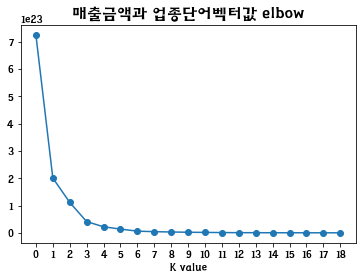

In [ ]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', family='HYsanB')
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(new_arr)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('매출금액과 업종단어벡터값 elbow',size=15)
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(new_arr)

KMeans(n_clusters=3)

In [ ]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
Kmean.cluster_centers_

array([[-5.63306768e-01,  1.06123762e+11],
       [ 3.08955918e-01,  1.75750824e+10],
       [ 1.17446024e+00,  3.75129318e+11]])

In [ ]:
all_age_df['cluster_id'] = Kmean.labels_
all_age_df

,Unnamed: 0,age,service_vector,price_values,real_service_name,cluster_id
0,0,20,1.347387,21891747960,가전제품,1
1,1,20,3.096979,16114519735,반찬가게,1
2,2,20,0.117790,50078779978,수산물판매,1
3,3,20,0.095883,10588766972,슈퍼마켓,1
4,4,20,1.559159,26976763385,시계및귀금속,1
...,...,...,...,...,...,...
62,62,50,-9.056071,2912602,청과상,1
63,63,50,-5.560386,1151876,커피-음료,1
64,64,50,12.856142,1160303,컴퓨터및주변장치판매,1
65,65,50,0.228537,3531532,편의점,1


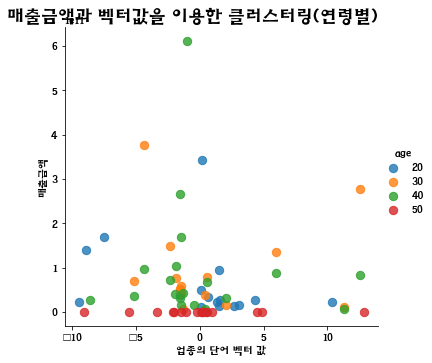

In [ ]:
import seaborn as sns
import matplotlib
%matplotlib inline

matplotlib.rc('font', family='HYsanB')

sns.lmplot('service_vector','price_values',data=all_age_df,fit_reg=False,scatter_kws={'s':70},hue='age')

plt.xlabel('업종의 단어 벡터 값')
plt.ylabel('매출금액')
#plt.figure(figsize=(30,30))

#for i,v in enumerate(all_age_df['real_service_name']):
#    plt.annotate(v, xy=(all_age_df['service_vector'][i],all_age_df['price_values'][i]))
plt.title('매출금액과 벡터값을 이용한 클러스터링(연령별)',size=17,loc='right') 
plt.show()

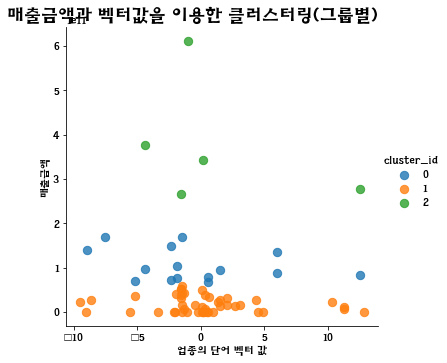

In [ ]:
sns.lmplot('service_vector','price_values',data=all_age_df,fit_reg=False,scatter_kws={'s':70},hue='cluster_id')

plt.xlabel('업종의 단어 벡터 값')
plt.ylabel('매출금액')
plt.title('매출금액과 벡터값을 이용한 클러스터링(그룹별)',size=17,loc='right')  

#for i,v in enumerate(all_age_df['real_service_name']):
#    plt.annotate(v, xy=(all_age_df['service_vector'][i],all_age_df['price_values'][i]))
plt.show()

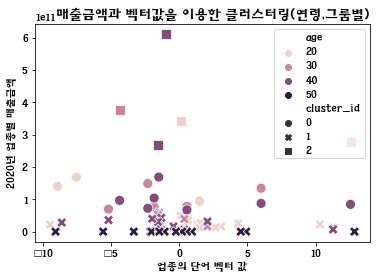

In [ ]:
sns.scatterplot('service_vector','price_values',data=all_age_df,s=100, hue='age',style='cluster_id')
plt.xlabel('업종의 단어 벡터 값')
plt.ylabel('2020년 업종별 매출금액')
plt.title('매출금액과 벡터값을 이용한 클러스터링(연령,그룹별)',size=13,loc='right')
plt.show()